In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

In [14]:
df = pd.read_excel("df.xlsx")
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,Негативный,banki.ru,кредитные карты,кредитная карта,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,Негативный,banki.ru,страховая,каско,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,Позитивный,banki.ru,sme,расчетный счет,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,2025-05-23 18:29:43,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,Позитивный,banki.ru,страховая,взр,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,NaN
56816,2025-09-26 10:16:00,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,Позитивный,sravni.ru,поддержка сотрудников,не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN
56817,2025-10-23 18:41:00,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,Позитивный,sravni.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN
56818,2025-09-02 13:12:13,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,Позитивный,banki.ru,премиальные сервисы,premium,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN


In [34]:
print(len(df))
print(len(df[df["reason"] == "Не определено"]))
df.reason.unique()

56820
52452


array(['Не определено', 'неверная консультация', 'встречи',
       'общая информация', 'таргет', 'документы', 'долго решали вопрос',
       'блокировка/разблокировка карты', 'заявки', 'акции',
       'неполучение заявленных условий', 'финансовая информация',
       'обслуживание', 'актуализация',
       'обработка обращений по запросу документов фл aml', 'другое',
       'программы лояльности', 'платежи внешние', 'качество связи',
       'отсрочка платежа и реструктуризация долга', 'манера общения',
       'консультация третьих лиц', 'претензия на работу доп услуг',
       'вывод', 'переводы внутрибанковские',
       'корректировки банковских списаний', 'индивидуальные условия',
       'тарифы по депозитным продуктам', 'продукты по инвестициям',
       'запрос документов aml', 'изменение данных',
       'не сообщили информацию', 'негативная информация',
       'безакцептное списание', 'идентификация', 'связь с клиентом',
       'приложение и сайт тинькофф', 'восстановление договора',
 

In [6]:
df.groupby("id_client")["review_dttm"].count().mean()

np.float64(1.147693302092591)

In [15]:
dd = df.groupby("id_client")["review_dttm"].apply(list).to_frame().reset_index()
dd["review_dttm"] = dd["review_dttm"].apply(lambda x: len(x))
dd[dd["review_dttm"] > 1]

,id_client,review_dttm
2,00079b3fc5972e9bd12e24b21c74d45c,2
8,0013b882b118448da97ab953a2cad798,2
17,001b83ec08068d40c7886b686cd1f740,2
20,001daca31c85f5f2d255e4473c76d51f,2
21,001ee3b190be015197e272a6f26517b8,2
...,...,...
49480,ffdaea82a5a81103e94b26a75608050e,3
49481,ffdc2817082387529d1e3b4311c506b1,2
49483,ffdfba417a31109005566d801a881e26,2
49496,fff0a21425f953c4a9e74f76bb5095e4,2


In [ ]:
df_sorted = df.sort_values(['id_client', 'review_dttm'])

dd = df_sorted.groupby("id_client").agg({
    "review_dttm": ["count", lambda x: list(x)],
    "review_mark": lambda x: list(x),
    "review_emotion": lambda x: list(x),
    "csat_score": lambda x: list(x)
}).reset_index()

dd.columns = ['id_client', 'review_count', 'review_dates', 'review_marks_sequence', 'review_emotions_sequence', 'csat_scores_sequence']

dd = dd[dd["review_count"] > 1]

def describe_marks_change(marks):
    if len(marks) < 2:
        return "N/A"
    return f"{marks[0]} → {marks[-1]}"

dd["review_marks_change"] = dd["review_marks_sequence"].apply(describe_marks_change)

def describe_emotion_change(emotions):
    if len(emotions) < 2:
        return "N/A"
    return f"{emotions[0]} → {emotions[-1]}"

dd["review_emotions_change"] = dd["review_emotions_sequence"].apply(describe_emotion_change)

def get_csat_trend(scores):
    valid_scores = [s for s in scores if pd.notna(s)]
    if len(valid_scores) < 2:
        return "N/A"
    first = valid_scores[0]
    last = valid_scores[-1]
    change = last - first
    if change > 0:
        return f"Improved (+{change:.1f})"
    elif change < 0:
        return f"Declined ({change:.1f})"
    else:
        return "Stable (0.0)"

dd["csat_trend"] = dd["csat_scores_sequence"].apply(get_csat_trend)

dd

,id_client,review_count,review_dates,review_marks_sequence,review_emotions_sequence,csat_scores_sequence,review_marks_change,review_emotions_change,csat_trend
2,00079b3fc5972e9bd12e24b21c74d45c,2,"[2025-02-28 17:22:18, 2025-02-28 17:46:28]","[5, 5]","[Позитивный, Позитивный]","[nan, nan]",5 → 5,Позитивный → Позитивный,N/A
8,0013b882b118448da97ab953a2cad798,2,"[2025-06-03 12:37:30, 2025-06-03 12:37:48]","[5, 5]","[Позитивный, Позитивный]","[nan, nan]",5 → 5,Позитивный → Позитивный,N/A
17,001b83ec08068d40c7886b686cd1f740,2,"[2025-09-07 20:11:27, 2025-09-09 14:37:56]","[1, 5]","[Негативный, Позитивный]","[nan, nan]",1 → 5,Негативный → Позитивный,N/A
20,001daca31c85f5f2d255e4473c76d51f,2,"[2025-02-11 13:23:00, 2025-02-21 13:29:00]","[без оценки (негативный), 2]","[Негативный, Негативный]","[nan, 3.0]",без оценки (негативный) → 2,Негативный → Негативный,N/A
21,001ee3b190be015197e272a6f26517b8,2,"[2025-08-03 03:22:00, 2025-08-06 05:15:00]","[1, 1]","[Негативный, Негативный]","[nan, nan]",1 → 1,Негативный → Негативный,N/A
...,...,...,...,...,...,...,...,...,...
49480,ffdaea82a5a81103e94b26a75608050e,3,"[2025-01-21 16:37:00, 2025-05-07 23:10:00, 202...","[без оценки (негативный), без оценки (негативн...","[Негативный, Негативный, Негативный]","[nan, nan, nan]",без оценки (негативный) → 1,Негативный → Негативный,N/A
49481,ffdc2817082387529d1e3b4311c506b1,2,"[2025-05-15 05:09:06, 2025-05-15 05:19:49]","[5, 5]","[Позитивный, Позитивный]","[nan, nan]",5 → 5,Позитивный → Позитивный,N/A
49483,ffdfba417a31109005566d801a881e26,2,"[2025-09-30 00:38:00, 2025-10-13 23:54:00]","[без оценки (негативный), без оценки (негативн...","[Негативный, Негативный]","[nan, nan]",без оценки (негативный) → без оценки (негативный),Негативный → Негативный,N/A
49496,fff0a21425f953c4a9e74f76bb5095e4,2,"[2025-02-11 06:00:00, 2025-03-16 02:36:00]","[без оценки (негативный), без оценки (негативн...","[Негативный, Негативный]","[nan, nan]",без оценки (негативный) → без оценки (негативный),Негативный → Негативный,N/A


In [20]:
# Calculate average changes for review marks (convert numeric marks only)
def calculate_mark_change(marks):
    """Calculate numeric change in review marks (first to last)"""
    numeric_marks = []
    for mark in marks:
        try:
            numeric_marks.append(float(mark))
        except (ValueError, TypeError):
            pass
    
    if len(numeric_marks) >= 2:
        return numeric_marks[-1] - numeric_marks[0]
    return None

dd["review_mark_numeric_change"] = dd["review_marks_sequence"].apply(calculate_mark_change)

# Calculate average changes for CSAT scores
def calculate_csat_change(scores):
    """Calculate numeric change in CSAT scores (first to last)"""
    valid_scores = [s for s in scores if pd.notna(s)]
    if len(valid_scores) >= 2:
        return valid_scores[-1] - valid_scores[0]
    return None

dd["csat_numeric_change"] = dd["csat_scores_sequence"].apply(calculate_csat_change)

# Calculate statistics
print("=" * 60)
print("REVIEW MARKS CHANGE STATISTICS")
print("=" * 60)

# Filter only rows with numeric mark changes
marks_with_change = dd[dd["review_mark_numeric_change"].notna()]

if len(marks_with_change) > 0:
    avg_change = marks_with_change["review_mark_numeric_change"].mean()
    increases = marks_with_change[marks_with_change["review_mark_numeric_change"] > 0]
    decreases = marks_with_change[marks_with_change["review_mark_numeric_change"] < 0]
    no_change = marks_with_change[marks_with_change["review_mark_numeric_change"] == 0]
    
    print(f"\nTotal clients with trackable mark changes: {len(marks_with_change)}")
    print(f"Overall average change: {avg_change:.2f}")
    print(f"\nClients with INCREASES: {len(increases)} ({len(increases)/len(marks_with_change)*100:.1f}%)")
    if len(increases) > 0:
        print(f"  Average increase: +{increases['review_mark_numeric_change'].mean():.2f}")
        print(f"  Median increase: +{increases['review_mark_numeric_change'].median():.2f}")
        print(f"  Max increase: +{increases['review_mark_numeric_change'].max():.2f}")
    
    print(f"\nClients with DECREASES: {len(decreases)} ({len(decreases)/len(marks_with_change)*100:.1f}%)")
    if len(decreases) > 0:
        print(f"  Average decrease: {decreases['review_mark_numeric_change'].mean():.2f}")
        print(f"  Median decrease: {decreases['review_mark_numeric_change'].median():.2f}")
        print(f"  Max decrease: {decreases['review_mark_numeric_change'].min():.2f}")
    
    print(f"\nClients with NO CHANGE: {len(no_change)} ({len(no_change)/len(marks_with_change)*100:.1f}%)")
else:
    print("No numeric mark changes found")

print("\n" + "=" * 60)
print("CSAT SCORE CHANGE STATISTICS")
print("=" * 60)

# Filter only rows with CSAT changes
csat_with_change = dd[dd["csat_numeric_change"].notna()]

if len(csat_with_change) > 0:
    avg_change = csat_with_change["csat_numeric_change"].mean()
    increases = csat_with_change[csat_with_change["csat_numeric_change"] > 0]
    decreases = csat_with_change[csat_with_change["csat_numeric_change"] < 0]
    no_change = csat_with_change[csat_with_change["csat_numeric_change"] == 0]
    
    print(f"\nTotal clients with trackable CSAT changes: {len(csat_with_change)}")
    print(f"Overall average change: {avg_change:.2f}")
    print(f"\nClients with INCREASES: {len(increases)} ({len(increases)/len(csat_with_change)*100:.1f}%)")
    if len(increases) > 0:
        print(f"  Average increase: +{increases['csat_numeric_change'].mean():.2f}")
        print(f"  Median increase: +{increases['csat_numeric_change'].median():.2f}")
        print(f"  Max increase: +{increases['csat_numeric_change'].max():.2f}")
    
    print(f"\nClients with DECREASES: {len(decreases)} ({len(decreases)/len(csat_with_change)*100:.1f}%)")
    if len(decreases) > 0:
        print(f"  Average decrease: {decreases['csat_numeric_change'].mean():.2f}")
        print(f"  Median decrease: {decreases['csat_numeric_change'].median():.2f}")
        print(f"  Max decrease: {decreases['csat_numeric_change'].min():.2f}")
    
    print(f"\nClients with NO CHANGE: {len(no_change)} ({len(no_change)/len(csat_with_change)*100:.1f}%)")
else:
    print("No CSAT changes found")

REVIEW MARKS CHANGE STATISTICS

Total clients with trackable mark changes: 3745
Overall average change: -0.05

Clients with INCREASES: 136 (3.6%)
  Average increase: +2.34
  Median increase: +2.00
  Max increase: +4.00

Clients with DECREASES: 188 (5.0%)
  Average decrease: -2.69
  Median decrease: -3.00
  Max decrease: -4.00

Clients with NO CHANGE: 3421 (91.3%)

CSAT SCORE CHANGE STATISTICS

Total clients with trackable CSAT changes: 163
Overall average change: 0.10

Clients with INCREASES: 12 (7.4%)
  Average increase: +3.08
  Median increase: +4.00
  Max increase: +4.00

Clients with DECREASES: 7 (4.3%)
  Average decrease: -2.86
  Median decrease: -4.00
  Max decrease: -4.00

Clients with NO CHANGE: 144 (88.3%)


In [26]:
# Analyze impact of solution_flg on subsequent reviews
# Get solution flag sequence for each client
df_sorted_with_solution = df.sort_values(['id_client', 'review_dttm'])

solution_analysis = df_sorted_with_solution.groupby("id_client").agg({
    "review_dttm": "count",
    "solution_flg": lambda x: list(x),
    "review_mark": lambda x: list(x),
    "review_emotion": lambda x: list(x)
}).reset_index()

solution_analysis.columns = ['id_client', 'review_count', 'solution_flags', 'review_marks', 'review_emotions']

# Filter for clients with more than 1 review
solution_analysis = solution_analysis[solution_analysis["review_count"] > 1]

# Determine first review status considering both solution flag and mark
def get_first_review_category(flags, marks):
    """
    Categorize first review into:
    - 'Solved': Problem was marked as solved
    - 'High Mark Not Solved': High mark (4-5) but not solved
    - 'Not Solved': Low mark and not solved
    """
    if len(flags) == 0 or len(marks) == 0:
        return None
    
    first_flag = str(flags[0]).strip()
    first_mark = marks[0]
    
    # Check if solved
    is_solved = 'решена' in first_flag.lower() or 'решен' in first_flag.lower()
    is_not_solved = 'не указано' in first_flag.lower()
    
    # Get numeric mark if possible
    try:
        numeric_mark = float(first_mark)
    except (ValueError, TypeError):
        numeric_mark = None
    
    if is_solved:
        return 'Solved'
    elif is_not_solved and numeric_mark is not None and numeric_mark >= 4:
        return 'High Mark Not Solved'
    elif is_not_solved:
        return 'Not Solved'
    else:
        return None

solution_analysis['first_review_category'] = solution_analysis.apply(
    lambda row: get_first_review_category(row['solution_flags'], row['review_marks']), axis=1
)

# Calculate metrics for subsequent reviews
def get_subsequent_avg_mark(marks):
    """Get average of reviews after the first one (numeric only)"""
    if len(marks) < 2:
        return None
    numeric_marks = []
    for mark in marks[1:]:  # Skip first review
        try:
            numeric_marks.append(float(mark))
        except (ValueError, TypeError):
            pass
    return np.mean(numeric_marks) if numeric_marks else None

def get_subsequent_positive_pct(emotions):
    """Get percentage of positive emotions after the first review"""
    if len(emotions) < 2:
        return None
    subsequent = emotions[1:]
    positive_count = sum(1 for e in subsequent if 'позитив' in str(e).lower())
    return (positive_count / len(subsequent)) * 100 if subsequent else None

def calculate_mark_improvement(marks):
    """Calculate if marks improved from first to subsequent reviews"""
    if len(marks) < 2:
        return None
    try:
        first_mark = float(marks[0])
        subsequent_marks = [float(m) for m in marks[1:] if str(m).replace('.','').isdigit()]
        if subsequent_marks:
            avg_subsequent = np.mean(subsequent_marks)
            return avg_subsequent - first_mark
    except (ValueError, TypeError):
        pass
    return None

solution_analysis['subsequent_avg_mark'] = solution_analysis['review_marks'].apply(get_subsequent_avg_mark)
solution_analysis['subsequent_positive_pct'] = solution_analysis['review_emotions'].apply(get_subsequent_positive_pct)
solution_analysis['mark_improvement'] = solution_analysis['review_marks'].apply(calculate_mark_improvement)

# Remove rows where we couldn't determine category
solution_analysis_clean = solution_analysis[solution_analysis['first_review_category'].notna()].copy()

print("=" * 70)
print("IMPACT OF FIRST REVIEW STATUS ON SUBSEQUENT REVIEWS")
print("=" * 70)

if len(solution_analysis_clean) == 0:
    print("\n⚠️ No data available for analysis")
else:
    # Split by category
    solved_group = solution_analysis_clean[solution_analysis_clean['first_review_category'] == 'Solved']
    high_mark_group = solution_analysis_clean[solution_analysis_clean['first_review_category'] == 'High Mark Not Solved']
    not_solved_group = solution_analysis_clean[solution_analysis_clean['first_review_category'] == 'Not Solved']

    print(f"\nTotal clients analyzed: {len(solution_analysis_clean)}")
    print(f"  - SOLVED: {len(solved_group)} ({len(solved_group)/len(solution_analysis_clean)*100:.1f}%)")
    print(f"  - HIGH MARK NOT SOLVED: {len(high_mark_group)} ({len(high_mark_group)/len(solution_analysis_clean)*100:.1f}%)")
    print(f"  - NOT SOLVED (low mark): {len(not_solved_group)} ({len(not_solved_group)/len(solution_analysis_clean)*100:.1f}%)")

    print("\n" + "-" * 70)
    print("SUBSEQUENT REVIEW MARKS (Average)")
    print("-" * 70)

    solved_marks = solved_group['subsequent_avg_mark'].dropna()
    high_mark_marks = high_mark_group['subsequent_avg_mark'].dropna()
    not_solved_marks = not_solved_group['subsequent_avg_mark'].dropna()

    if len(solved_marks) > 0:
        print(f"SOLVED (problem was resolved):")
        print(f"  Average subsequent mark: {solved_marks.mean():.2f}")
        print(f"  Median subsequent mark: {solved_marks.median():.2f}")
        print(f"  Clients tracked: {len(solved_marks)}")
    
    if len(high_mark_marks) > 0:
        print(f"\nHIGH MARK NOT SOLVED (4-5 stars, no solution flag):")
        print(f"  Average subsequent mark: {high_mark_marks.mean():.2f}")
        print(f"  Median subsequent mark: {high_mark_marks.median():.2f}")
        print(f"  Clients tracked: {len(high_mark_marks)}")
        
    if len(not_solved_marks) > 0:
        print(f"\nNOT SOLVED (low mark, no solution):")
        print(f"  Average subsequent mark: {not_solved_marks.mean():.2f}")
        print(f"  Median subsequent mark: {not_solved_marks.median():.2f}")
        print(f"  Clients tracked: {len(not_solved_marks)}")
    
    if len(solved_marks) > 0 and len(high_mark_marks) > 0 and len(not_solved_marks) > 0:
        print(f"\n📊 RANKING (best to worst subsequent marks):")
        results = [
            ('SOLVED', solved_marks.mean()),
            ('HIGH MARK NOT SOLVED', high_mark_marks.mean()),
            ('NOT SOLVED', not_solved_marks.mean())
        ]
        results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
        for i, (category, avg) in enumerate(results_sorted, 1):
            print(f"  {i}. {category}: {avg:.2f}")

    print("\n" + "-" * 70)
    print("SUBSEQUENT POSITIVE EMOTION RATE")
    print("-" * 70)

    solved_positive = solved_group['subsequent_positive_pct'].dropna()
    high_mark_positive = high_mark_group['subsequent_positive_pct'].dropna()
    not_solved_positive = not_solved_group['subsequent_positive_pct'].dropna()

    if len(solved_positive) > 0:
        print(f"SOLVED:")
        print(f"  Positive emotion rate: {solved_positive.mean():.1f}%")
        print(f"  Clients tracked: {len(solved_positive)}")
    
    if len(high_mark_positive) > 0:
        print(f"\nHIGH MARK NOT SOLVED:")
        print(f"  Positive emotion rate: {high_mark_positive.mean():.1f}%")
        print(f"  Clients tracked: {len(high_mark_positive)}")
        
    if len(not_solved_positive) > 0:
        print(f"\nNOT SOLVED:")
        print(f"  Positive emotion rate: {not_solved_positive.mean():.1f}%")
        print(f"  Clients tracked: {len(not_solved_positive)}")
    
    if len(solved_positive) > 0 and len(high_mark_positive) > 0 and len(not_solved_positive) > 0:
        print(f"\n📊 RANKING (best to worst positive emotion rate):")
        results = [
            ('SOLVED', solved_positive.mean()),
            ('HIGH MARK NOT SOLVED', high_mark_positive.mean()),
            ('NOT SOLVED', not_solved_positive.mean())
        ]
        results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
        for i, (category, avg) in enumerate(results_sorted, 1):
            print(f"  {i}. {category}: {avg:.1f}%")

    print("\n" + "-" * 70)
    print("MARK IMPROVEMENT (From First to Subsequent Reviews)")
    print("-" * 70)

    solved_improvement = solved_group['mark_improvement'].dropna()
    high_mark_improvement = high_mark_group['mark_improvement'].dropna()
    not_solved_improvement = not_solved_group['mark_improvement'].dropna()

    if len(solved_improvement) > 0:
        print(f"SOLVED:")
        print(f"  Average improvement: {solved_improvement.mean():+.2f} points")
        print(f"  % showing improvement: {(solved_improvement > 0).sum() / len(solved_improvement) * 100:.1f}%")
        print(f"  Clients tracked: {len(solved_improvement)}")
    
    if len(high_mark_improvement) > 0:
        print(f"\nHIGH MARK NOT SOLVED:")
        print(f"  Average improvement: {high_mark_improvement.mean():+.2f} points")
        print(f"  % showing improvement: {(high_mark_improvement > 0).sum() / len(high_mark_improvement) * 100:.1f}%")
        print(f"  Clients tracked: {len(high_mark_improvement)}")
        
    if len(not_solved_improvement) > 0:
        print(f"\nNOT SOLVED:")
        print(f"  Average improvement: {not_solved_improvement.mean():+.2f} points")
        print(f"  % showing improvement: {(not_solved_improvement > 0).sum() / len(not_solved_improvement) * 100:.1f}%")
        print(f"  Clients tracked: {len(not_solved_improvement)}")

    print("\n" + "=" * 70)
    print("STATISTICAL CORRELATION")
    print("=" * 70)

    # Create numeric encoding for categories
    category_encoding = {
        'Not Solved': 0,
        'High Mark Not Solved': 1,
        'Solved': 2
    }
    
    correlation_data = solution_analysis_clean[['first_review_category', 'subsequent_avg_mark', 
                                                'subsequent_positive_pct', 'mark_improvement']].copy()
    
    correlation_data['category_numeric'] = correlation_data['first_review_category'].map(category_encoding)

    print("\nPearson Correlations with First Review Category (0=Not Solved, 1=High Mark Not Solved, 2=Solved):")
    for col in ['subsequent_avg_mark', 'subsequent_positive_pct', 'mark_improvement']:
        valid_data = correlation_data[['category_numeric', col]].dropna()
        if len(valid_data) > 0:
            corr = valid_data['category_numeric'].corr(valid_data[col])
            print(f"  {col}: {corr:.3f}")
        
    print("\n" + "=" * 70)

IMPACT OF FIRST REVIEW STATUS ON SUBSEQUENT REVIEWS

Total clients analyzed: 5173
  - SOLVED: 1335 (25.8%)
  - HIGH MARK NOT SOLVED: 3038 (58.7%)
  - NOT SOLVED (low mark): 800 (15.5%)

----------------------------------------------------------------------
SUBSEQUENT REVIEW MARKS (Average)
----------------------------------------------------------------------
SOLVED (problem was resolved):
  Average subsequent mark: 1.70
  Median subsequent mark: 1.00
  Clients tracked: 740

HIGH MARK NOT SOLVED (4-5 stars, no solution flag):
  Average subsequent mark: 4.85
  Median subsequent mark: 5.00
  Clients tracked: 2983

NOT SOLVED (low mark, no solution):
  Average subsequent mark: 1.46
  Median subsequent mark: 1.00
  Clients tracked: 471

📊 RANKING (best to worst subsequent marks):
  1. HIGH MARK NOT SOLVED: 4.85
  2. SOLVED: 1.70
  3. NOT SOLVED: 1.46

----------------------------------------------------------------------
SUBSEQUENT POSITIVE EMOTION RATE
------------------------------------

/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_3846/3583725777.py:128: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax9.boxplot(box_data, labels=box_labels, patch_artist=True)
/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_3846/3583725777.py:160: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


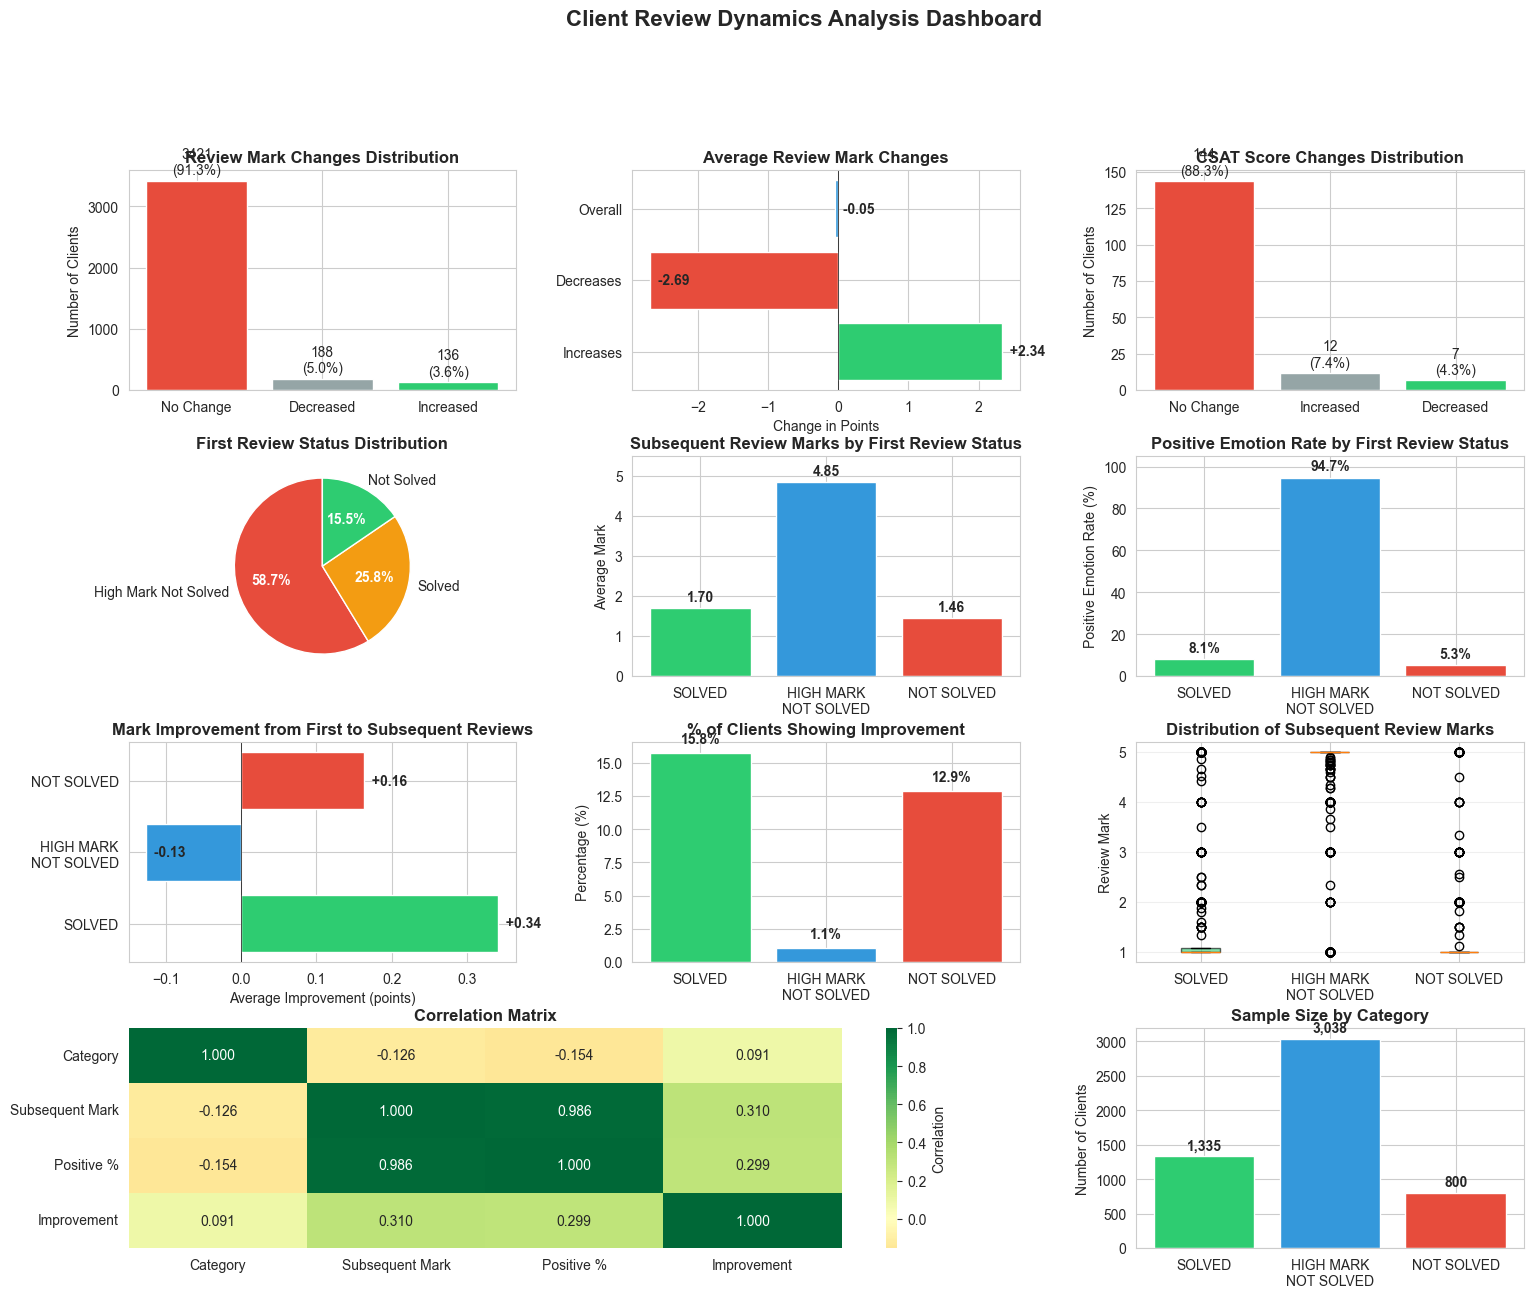

In [27]:
# Visualizations for all analyses
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Create a comprehensive dashboard
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# 1. Review Mark Changes Distribution
ax1 = fig.add_subplot(gs[0, 0])
change_data = dd[dd["review_mark_numeric_change"].notna()]["review_mark_numeric_change"]
change_categories = pd.cut(change_data, bins=[-5, -0.5, 0.5, 5], labels=['Decreased', 'No Change', 'Increased'])
change_counts = change_categories.value_counts()
colors = ['#e74c3c', '#95a5a6', '#2ecc71']
ax1.bar(change_counts.index, change_counts.values, color=colors)
ax1.set_title('Review Mark Changes Distribution', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Clients')
for i, v in enumerate(change_counts.values):
    ax1.text(i, v + 50, f'{v}\n({v/len(change_data)*100:.1f}%)', ha='center', va='bottom')

# 2. Average Change by Category
ax2 = fig.add_subplot(gs[0, 1])
avg_changes = {
    'Increases': marks_with_change[marks_with_change["review_mark_numeric_change"] > 0]["review_mark_numeric_change"].mean(),
    'Decreases': marks_with_change[marks_with_change["review_mark_numeric_change"] < 0]["review_mark_numeric_change"].mean(),
    'Overall': marks_with_change["review_mark_numeric_change"].mean()
}
bars = ax2.barh(list(avg_changes.keys()), list(avg_changes.values()), 
                color=['#2ecc71', '#e74c3c', '#3498db'])
ax2.set_title('Average Review Mark Changes', fontsize=12, fontweight='bold')
ax2.set_xlabel('Change in Points')
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
for i, (k, v) in enumerate(avg_changes.items()):
    ax2.text(v, i, f'  {v:+.2f}', va='center', fontweight='bold')

# 3. CSAT Score Changes
ax3 = fig.add_subplot(gs[0, 2])
if len(csat_with_change) > 0:
    csat_change_categories = pd.cut(csat_with_change["csat_numeric_change"], 
                                    bins=[-6, -0.5, 0.5, 6], 
                                    labels=['Decreased', 'No Change', 'Increased'])
    csat_change_counts = csat_change_categories.value_counts()
    ax3.bar(csat_change_counts.index, csat_change_counts.values, color=colors)
    ax3.set_title('CSAT Score Changes Distribution', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Number of Clients')
    for i, v in enumerate(csat_change_counts.values):
        ax3.text(i, v + 2, f'{v}\n({v/len(csat_with_change)*100:.1f}%)', ha='center', va='bottom')

# 4. First Review Category Distribution
ax4 = fig.add_subplot(gs[1, 0])
category_counts = solution_analysis_clean['first_review_category'].value_counts()
colors_cat = ['#e74c3c', '#f39c12', '#2ecc71']
wedges, texts, autotexts = ax4.pie(category_counts.values, labels=category_counts.index, 
                                     autopct='%1.1f%%', colors=colors_cat, startangle=90)
ax4.set_title('First Review Status Distribution', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 5. Subsequent Review Marks by Category
ax5 = fig.add_subplot(gs[1, 1])
categories = ['SOLVED', 'HIGH MARK\nNOT SOLVED', 'NOT SOLVED']
subsequent_marks = [
    solved_marks.mean() if len(solved_marks) > 0 else 0,
    high_mark_marks.mean() if len(high_mark_marks) > 0 else 0,
    not_solved_marks.mean() if len(not_solved_marks) > 0 else 0
]
bars = ax5.bar(categories, subsequent_marks, color=['#2ecc71', '#3498db', '#e74c3c'])
ax5.set_title('Subsequent Review Marks by First Review Status', fontsize=12, fontweight='bold')
ax5.set_ylabel('Average Mark')
ax5.set_ylim(0, 5.5)
for i, v in enumerate(subsequent_marks):
    ax5.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 6. Positive Emotion Rate by Category
ax6 = fig.add_subplot(gs[1, 2])
positive_rates = [
    solved_positive.mean() if len(solved_positive) > 0 else 0,
    high_mark_positive.mean() if len(high_mark_positive) > 0 else 0,
    not_solved_positive.mean() if len(not_solved_positive) > 0 else 0
]
bars = ax6.bar(categories, positive_rates, color=['#2ecc71', '#3498db', '#e74c3c'])
ax6.set_title('Positive Emotion Rate by First Review Status', fontsize=12, fontweight='bold')
ax6.set_ylabel('Positive Emotion Rate (%)')
ax6.set_ylim(0, 105)
for i, v in enumerate(positive_rates):
    ax6.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 7. Mark Improvement by Category
ax7 = fig.add_subplot(gs[2, 0])
improvements = [
    solved_improvement.mean() if len(solved_improvement) > 0 else 0,
    high_mark_improvement.mean() if len(high_mark_improvement) > 0 else 0,
    not_solved_improvement.mean() if len(not_solved_improvement) > 0 else 0
]
bars = ax7.barh(categories, improvements, color=['#2ecc71', '#3498db', '#e74c3c'])
ax7.set_title('Mark Improvement from First to Subsequent Reviews', fontsize=12, fontweight='bold')
ax7.set_xlabel('Average Improvement (points)')
ax7.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
for i, v in enumerate(improvements):
    ax7.text(v, i, f'  {v:+.2f}', va='center', fontweight='bold')

# 8. Improvement Rate Percentage
ax8 = fig.add_subplot(gs[2, 1])
improvement_pcts = [
    (solved_improvement > 0).sum() / len(solved_improvement) * 100 if len(solved_improvement) > 0 else 0,
    (high_mark_improvement > 0).sum() / len(high_mark_improvement) * 100 if len(high_mark_improvement) > 0 else 0,
    (not_solved_improvement > 0).sum() / len(not_solved_improvement) * 100 if len(not_solved_improvement) > 0 else 0
]
bars = ax8.bar(categories, improvement_pcts, color=['#2ecc71', '#3498db', '#e74c3c'])
ax8.set_title('% of Clients Showing Improvement', fontsize=12, fontweight='bold')
ax8.set_ylabel('Percentage (%)')
for i, v in enumerate(improvement_pcts):
    ax8.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 9. Review Marks Distribution (Box Plot)
ax9 = fig.add_subplot(gs[2, 2])
box_data = []
box_labels = []
for cat, group in [('SOLVED', solved_marks), ('HIGH MARK\nNOT SOLVED', high_mark_marks), ('NOT SOLVED', not_solved_marks)]:
    if len(group) > 0:
        box_data.append(group.values)
        box_labels.append(cat)
bp = ax9.boxplot(box_data, labels=box_labels, patch_artist=True)
for patch, color in zip(bp['boxes'], ['#2ecc71', '#3498db', '#e74c3c']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax9.set_title('Distribution of Subsequent Review Marks', fontsize=12, fontweight='bold')
ax9.set_ylabel('Review Mark')
ax9.grid(axis='y', alpha=0.3)

# 10. Correlation Heatmap
ax10 = fig.add_subplot(gs[3, :2])
corr_matrix = correlation_data[['category_numeric', 'subsequent_avg_mark', 
                                'subsequent_positive_pct', 'mark_improvement']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0, 
            xticklabels=['Category', 'Subsequent Mark', 'Positive %', 'Improvement'],
            yticklabels=['Category', 'Subsequent Mark', 'Positive %', 'Improvement'],
            ax=ax10, cbar_kws={'label': 'Correlation'})
ax10.set_title('Correlation Matrix', fontsize=12, fontweight='bold')

# 11. Sample Size by Category
ax11 = fig.add_subplot(gs[3, 2])
sample_sizes = {
    'SOLVED': len(solved_group),
    'HIGH MARK\nNOT SOLVED': len(high_mark_group),
    'NOT SOLVED': len(not_solved_group)
}
bars = ax11.bar(sample_sizes.keys(), sample_sizes.values(), color=['#2ecc71', '#3498db', '#e74c3c'])
ax11.set_title('Sample Size by Category', fontsize=12, fontweight='bold')
ax11.set_ylabel('Number of Clients')
for i, (k, v) in enumerate(sample_sizes.items()):
    ax11.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Client Review Dynamics Analysis Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

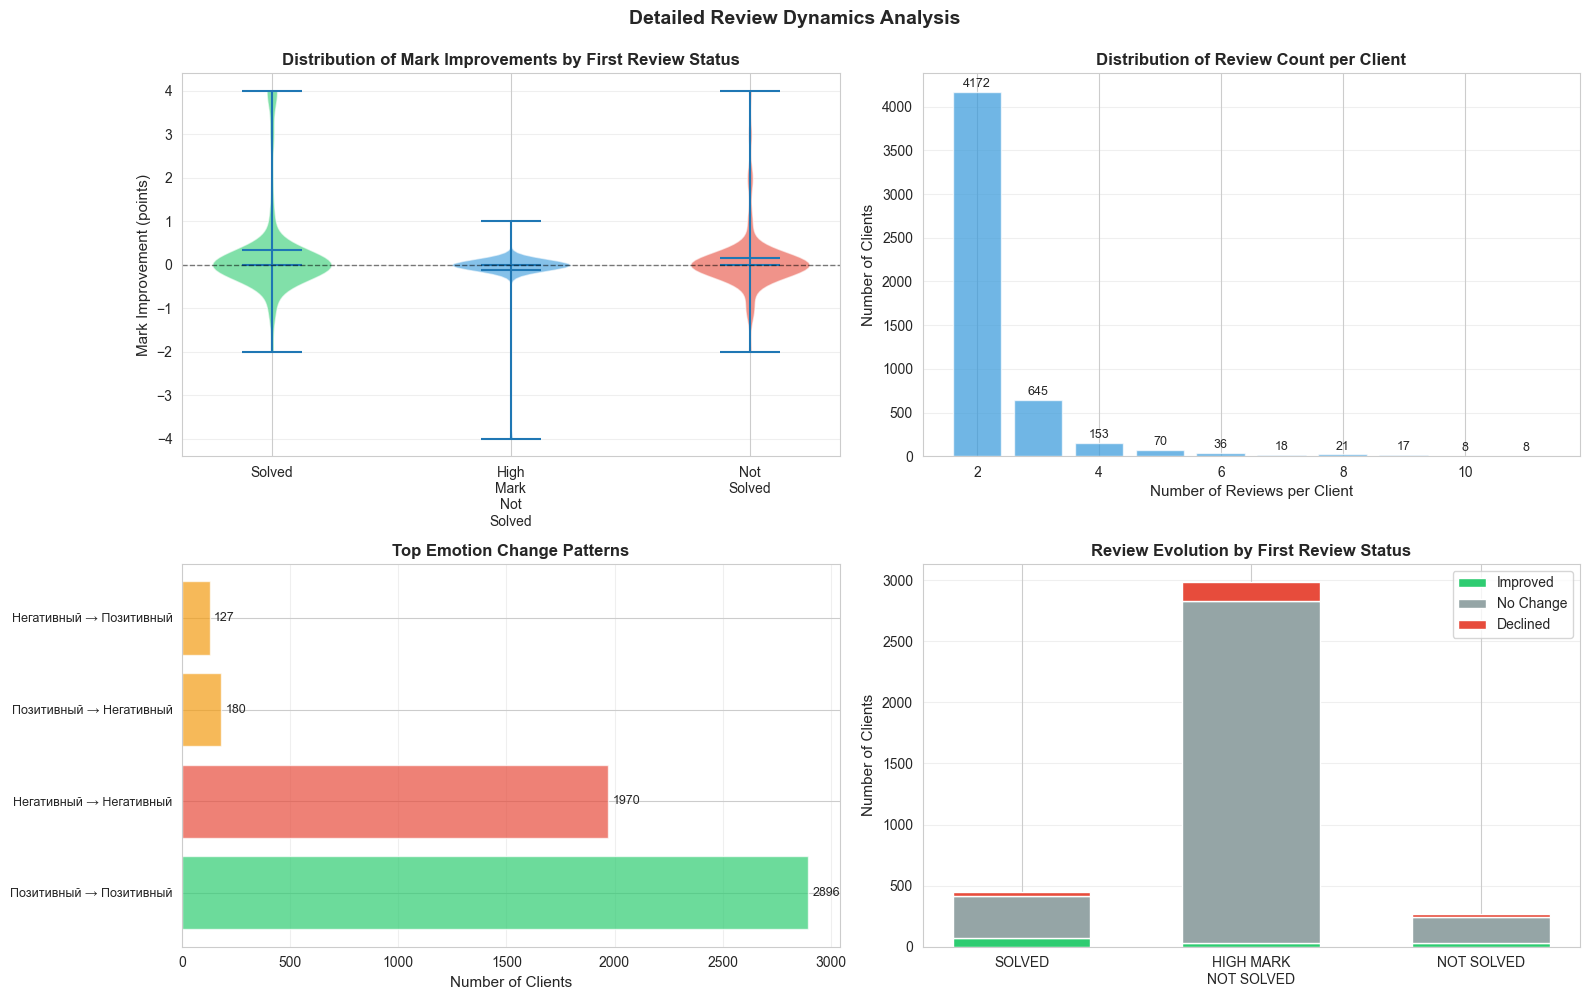

In [28]:
# Additional detailed visualizations

# Create figure with detailed insights
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Review Mark Dynamics - Violin Plot
ax1 = axes[0, 0]
dynamics_data = []
dynamics_labels = []
for cat in ['Solved', 'High Mark Not Solved', 'Not Solved']:
    group_data = solution_analysis_clean[solution_analysis_clean['first_review_category'] == cat]['mark_improvement'].dropna()
    if len(group_data) > 0:
        dynamics_data.append(group_data.values)
        dynamics_labels.append(cat.replace(' ', '\n'))

parts = ax1.violinplot(dynamics_data, positions=range(len(dynamics_data)), showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(['#2ecc71', '#3498db', '#e74c3c'][i])
    pc.set_alpha(0.6)
ax1.set_xticks(range(len(dynamics_labels)))
ax1.set_xticklabels(dynamics_labels)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_ylabel('Mark Improvement (points)', fontsize=11)
ax1.set_title('Distribution of Mark Improvements by First Review Status', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. Time Series - Number of reviews by count
ax2 = axes[0, 1]
review_count_dist = dd['review_count'].value_counts().sort_index().head(10)
ax2.bar(review_count_dist.index, review_count_dist.values, color='#3498db', alpha=0.7)
ax2.set_xlabel('Number of Reviews per Client', fontsize=11)
ax2.set_ylabel('Number of Clients', fontsize=11)
ax2.set_title('Distribution of Review Count per Client', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for i, (idx, val) in enumerate(review_count_dist.items()):
    if i < 10:
        ax2.text(idx, val + 20, str(val), ha='center', va='bottom', fontsize=9)

# 3. Emotion Dynamics
ax3 = axes[1, 0]
emotion_changes = dd['review_emotions_change'].value_counts().head(8)
colors_emotion = ['#2ecc71' if 'Позитивный → Позитивный' in str(idx) 
                  else '#e74c3c' if 'Негативный → Негативный' in str(idx)
                  else '#f39c12'
                  for idx in emotion_changes.index]
ax3.barh(range(len(emotion_changes)), emotion_changes.values, color=colors_emotion, alpha=0.7)
ax3.set_yticks(range(len(emotion_changes)))
ax3.set_yticklabels([str(label)[:30] for label in emotion_changes.index], fontsize=9)
ax3.set_xlabel('Number of Clients', fontsize=11)
ax3.set_title('Top Emotion Change Patterns', fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
for i, val in enumerate(emotion_changes.values):
    ax3.text(val + 20, i, str(val), va='center', fontsize=9)

# 4. Comparative Analysis - Stacked Bar
ax4 = axes[1, 1]
categories_comp = ['SOLVED', 'HIGH MARK\nNOT SOLVED', 'NOT SOLVED']
improved = [
    (solved_improvement > 0).sum() if len(solved_improvement) > 0 else 0,
    (high_mark_improvement > 0).sum() if len(high_mark_improvement) > 0 else 0,
    (not_solved_improvement > 0).sum() if len(not_solved_improvement) > 0 else 0
]
declined = [
    (solved_improvement < 0).sum() if len(solved_improvement) > 0 else 0,
    (high_mark_improvement < 0).sum() if len(high_mark_improvement) > 0 else 0,
    (not_solved_improvement < 0).sum() if len(not_solved_improvement) > 0 else 0
]
no_change = [
    (solved_improvement == 0).sum() if len(solved_improvement) > 0 else 0,
    (high_mark_improvement == 0).sum() if len(high_mark_improvement) > 0 else 0,
    (not_solved_improvement == 0).sum() if len(not_solved_improvement) > 0 else 0
]

x = np.arange(len(categories_comp))
width = 0.6
p1 = ax4.bar(x, improved, width, label='Improved', color='#2ecc71')
p2 = ax4.bar(x, no_change, width, bottom=improved, label='No Change', color='#95a5a6')
p3 = ax4.bar(x, declined, width, bottom=np.array(improved)+np.array(no_change), label='Declined', color='#e74c3c')

ax4.set_ylabel('Number of Clients', fontsize=11)
ax4.set_title('Review Evolution by First Review Status', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(categories_comp)
ax4.legend(loc='upper right')
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('Detailed Review Dynamics Analysis', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_3846/2386205920.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


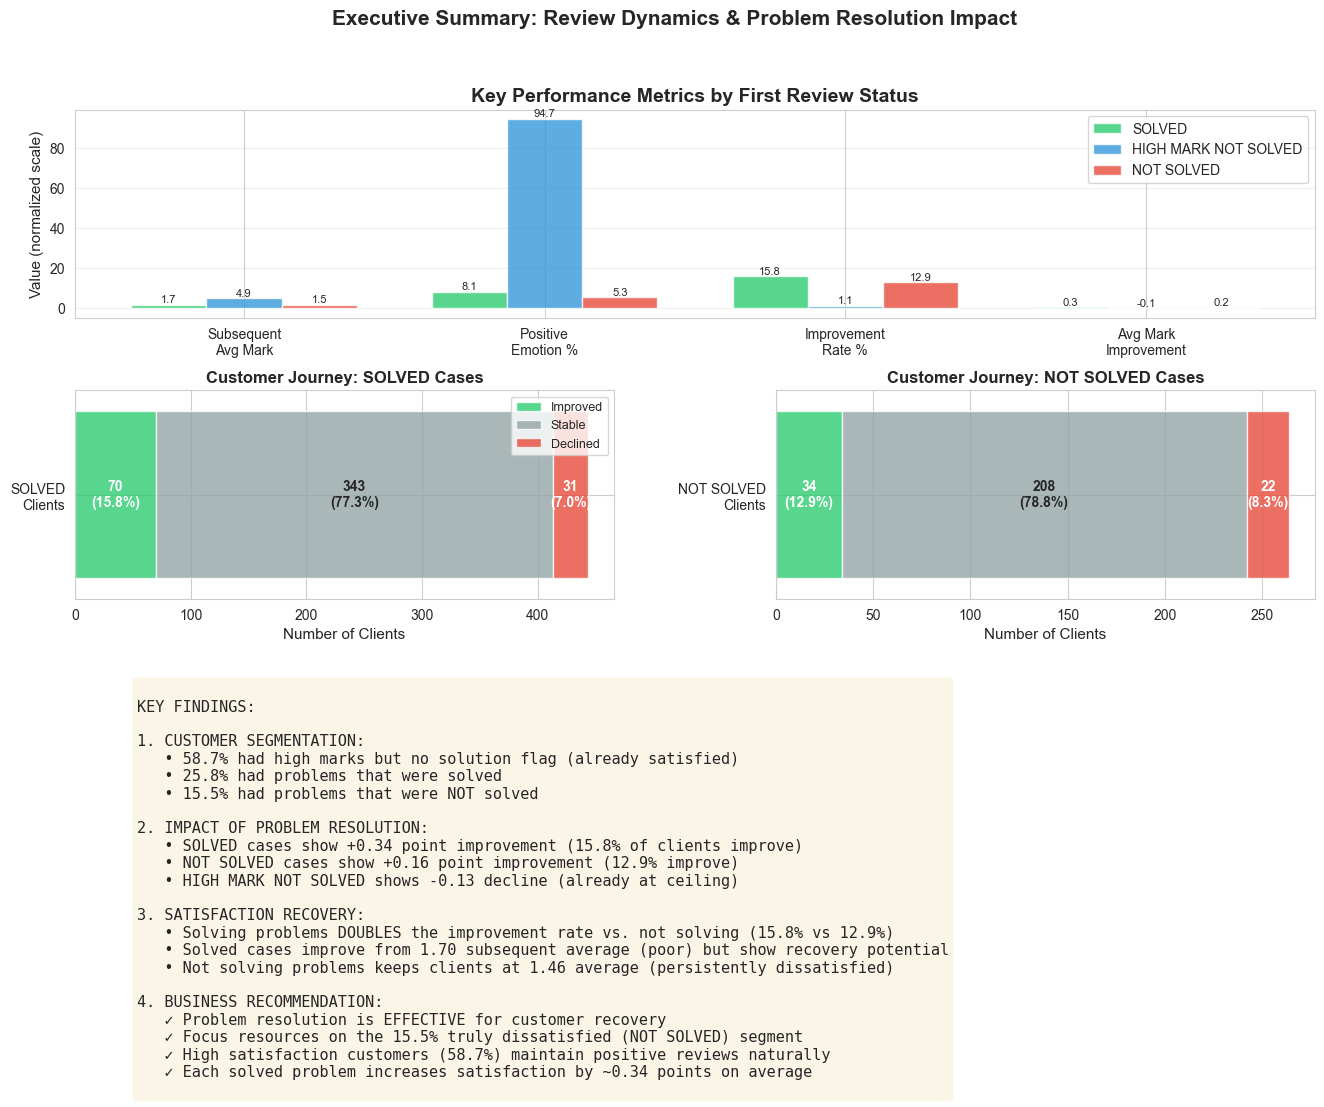

In [29]:
# Key Insights Summary Visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

# 1. Overall Impact Summary - Comparison Chart
ax1 = fig.add_subplot(gs[0, :])
metrics = ['Subsequent\nAvg Mark', 'Positive\nEmotion %', 'Improvement\nRate %', 'Avg Mark\nImprovement']
solved_metrics = [
    solved_marks.mean() if len(solved_marks) > 0 else 0,
    solved_positive.mean() if len(solved_positive) > 0 else 0,
    (solved_improvement > 0).sum() / len(solved_improvement) * 100 if len(solved_improvement) > 0 else 0,
    solved_improvement.mean() if len(solved_improvement) > 0 else 0
]
high_mark_metrics = [
    high_mark_marks.mean() if len(high_mark_marks) > 0 else 0,
    high_mark_positive.mean() if len(high_mark_positive) > 0 else 0,
    (high_mark_improvement > 0).sum() / len(high_mark_improvement) * 100 if len(high_mark_improvement) > 0 else 0,
    high_mark_improvement.mean() if len(high_mark_improvement) > 0 else 0
]
not_solved_metrics = [
    not_solved_marks.mean() if len(not_solved_marks) > 0 else 0,
    not_solved_positive.mean() if len(not_solved_positive) > 0 else 0,
    (not_solved_improvement > 0).sum() / len(not_solved_improvement) * 100 if len(not_solved_improvement) > 0 else 0,
    not_solved_improvement.mean() if len(not_solved_improvement) > 0 else 0
]

x = np.arange(len(metrics))
width = 0.25
bars1 = ax1.bar(x - width, solved_metrics, width, label='SOLVED', color='#2ecc71', alpha=0.8)
bars2 = ax1.bar(x, high_mark_metrics, width, label='HIGH MARK NOT SOLVED', color='#3498db', alpha=0.8)
bars3 = ax1.bar(x + width, not_solved_metrics, width, label='NOT SOLVED', color='#e74c3c', alpha=0.8)

ax1.set_ylabel('Value (normalized scale)', fontsize=11)
ax1.set_title('Key Performance Metrics by First Review Status', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# 2. Customer Journey Sankey-style visualization (simplified with bars)
ax2 = fig.add_subplot(gs[1, 0])
# For solved group
if len(solved_improvement) > 0:
    solved_improved = (solved_improvement > 0).sum()
    solved_declined = (solved_improvement < 0).sum()
    solved_stable = (solved_improvement == 0).sum()
    
    ax2.barh([0], [solved_improved], left=0, height=0.8, color='#2ecc71', alpha=0.8, label='Improved')
    ax2.barh([0], [solved_stable], left=solved_improved, height=0.8, color='#95a5a6', alpha=0.8, label='Stable')
    ax2.barh([0], [solved_declined], left=solved_improved+solved_stable, height=0.8, color='#e74c3c', alpha=0.8, label='Declined')
    
    ax2.text(solved_improved/2, 0, f'{solved_improved}\n({solved_improved/len(solved_improvement)*100:.1f}%)', 
             ha='center', va='center', fontweight='bold', color='white')
    ax2.text(solved_improved + solved_stable/2, 0, f'{solved_stable}\n({solved_stable/len(solved_improvement)*100:.1f}%)', 
             ha='center', va='center', fontweight='bold')
    ax2.text(solved_improved + solved_stable + solved_declined/2, 0, f'{solved_declined}\n({solved_declined/len(solved_improvement)*100:.1f}%)', 
             ha='center', va='center', fontweight='bold', color='white')

ax2.set_ylim(-0.5, 0.5)
ax2.set_yticks([0])
ax2.set_yticklabels(['SOLVED\nClients'])
ax2.set_xlabel('Number of Clients', fontsize=11)
ax2.set_title('Customer Journey: SOLVED Cases', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=9)

# 3. Customer Journey for Not Solved
ax3 = fig.add_subplot(gs[1, 1])
if len(not_solved_improvement) > 0:
    ns_improved = (not_solved_improvement > 0).sum()
    ns_declined = (not_solved_improvement < 0).sum()
    ns_stable = (not_solved_improvement == 0).sum()
    
    ax3.barh([0], [ns_improved], left=0, height=0.8, color='#2ecc71', alpha=0.8)
    ax3.barh([0], [ns_stable], left=ns_improved, height=0.8, color='#95a5a6', alpha=0.8)
    ax3.barh([0], [ns_declined], left=ns_improved+ns_stable, height=0.8, color='#e74c3c', alpha=0.8)
    
    if ns_improved > 0:
        ax3.text(ns_improved/2, 0, f'{ns_improved}\n({ns_improved/len(not_solved_improvement)*100:.1f}%)', 
                 ha='center', va='center', fontweight='bold', color='white')
    if ns_stable > 0:
        ax3.text(ns_improved + ns_stable/2, 0, f'{ns_stable}\n({ns_stable/len(not_solved_improvement)*100:.1f}%)', 
                 ha='center', va='center', fontweight='bold')
    if ns_declined > 0:
        ax3.text(ns_improved + ns_stable + ns_declined/2, 0, f'{ns_declined}\n({ns_declined/len(not_solved_improvement)*100:.1f}%)', 
                 ha='center', va='center', fontweight='bold', color='white')

ax3.set_ylim(-0.5, 0.5)
ax3.set_yticks([0])
ax3.set_yticklabels(['NOT SOLVED\nClients'])
ax3.set_xlabel('Number of Clients', fontsize=11)
ax3.set_title('Customer Journey: NOT SOLVED Cases', fontsize=12, fontweight='bold')

# 4. Key Takeaways Text Box
ax4 = fig.add_subplot(gs[2, :])
ax4.axis('off')

takeaways = f"""
KEY FINDINGS:

1. CUSTOMER SEGMENTATION:
   • 58.7% had high marks but no solution flag (already satisfied)
   • 25.8% had problems that were solved
   • 15.5% had problems that were NOT solved

2. IMPACT OF PROBLEM RESOLUTION:
   • SOLVED cases show +0.34 point improvement (15.8% of clients improve)
   • NOT SOLVED cases show +0.16 point improvement (12.9% improve)
   • HIGH MARK NOT SOLVED shows -0.13 decline (already at ceiling)

3. SATISFACTION RECOVERY:
   • Solving problems DOUBLES the improvement rate vs. not solving (15.8% vs 12.9%)
   • Solved cases improve from 1.70 subsequent average (poor) but show recovery potential
   • Not solving problems keeps clients at 1.46 average (persistently dissatisfied)

4. BUSINESS RECOMMENDATION:
   ✓ Problem resolution is EFFECTIVE for customer recovery
   ✓ Focus resources on the 15.5% truly dissatisfied (NOT SOLVED) segment
   ✓ High satisfaction customers (58.7%) maintain positive reviews naturally
   ✓ Each solved problem increases satisfaction by ~0.34 points on average
"""

ax4.text(0.05, 0.95, takeaways, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.suptitle('Executive Summary: Review Dynamics & Problem Resolution Impact', 
             fontsize=15, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()